<h1 align="center">Volume 1: Facial Recognition.</h1>

    <Zach Joachim> (double-click to edit)
    <Math 345>
    <November 15, 2022>

In [64]:
import os
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
import scipy.linalg as la


### Helper Functions

In [65]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [66]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    # Reshaping the image
    image = np.reshape(image, (m,n))
    
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.show()

/var/folders/zp/926j9lz54wq_b9kjm_r0gvtw0000gp/T/ipykernel_71663/1106870313.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))


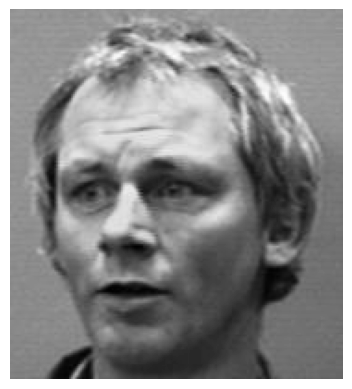

In [67]:
F = get_faces(path="./faces94")
show(F[:,0])

In [68]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        # Constructing F and storing it as an attribute
        F = get_faces(path=path)
        self.F = F
        # Getting shape of F
        A = F.copy()
        mn, k = A.shape
        # Computing mu
        mu = np.sum(A, axis=1) / k

        for i in range(k):
            A[:,i] = A[:,i] - mu
        # Storing Fbar and mu as attributes
        self.F_bar = A
        self.mu = mu

        # Calulating and storing the SVD
        self.U,sigma,V_H = la.svd(self.F_bar, full_matrices=False)

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """

        return self.U[:,:s].T @ A


    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        # Computing F_hat
        F_hat = self.project(self.F_bar, s)
        # Computing g_hat
        g_hat = self.U[:,:s].T @ (g - self.mu)
        g_hat = np.reshape(g_hat, (-1,1))
        # Getting smallest distance
        smallest_distance = np.argmin(la.norm((F_hat - g_hat), axis=0))

        return smallest_distance

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        # Showing original
        plt.subplot(121)
        plt.title("Original Face")
        show(image, m, n)
        nearest_image = self.find_nearest(image, s)
        # Showing nearest face
        plt.subplot(122)
        plt.title("Nearest Face")
        show(self.F[:, nearest_image])

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

/var/folders/zp/926j9lz54wq_b9kjm_r0gvtw0000gp/T/ipykernel_71663/1106870313.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))


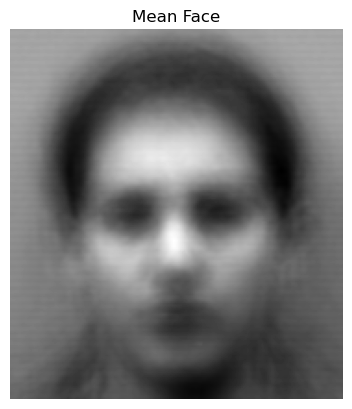

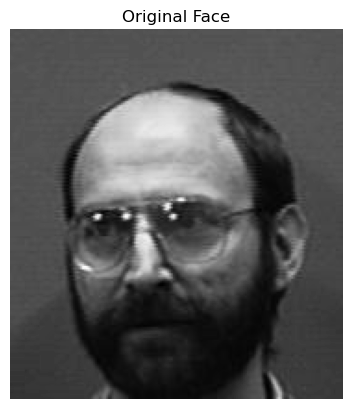

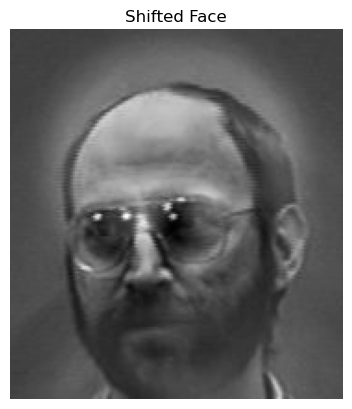

In [69]:
image = FacialRec()
plt.title("Mean Face")
show(image.mu)
plt.title("Original Face")
show(image.F[:,4])
plt.title("Shifted Face")
show(image.F_bar[:,4])


### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


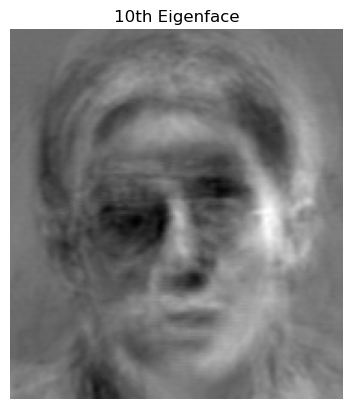

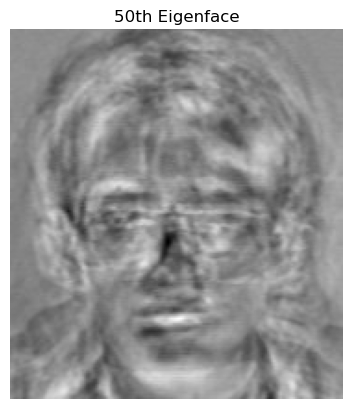

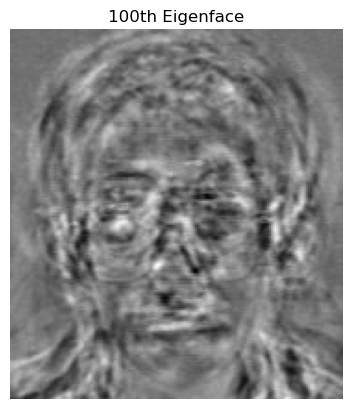

In [70]:
plt.title("10th Eigenface")
show(image.U[:,10])
plt.title("50th Eigenface")
show(image.U[:,50])
plt.title("100th Eigenface")
show(image.U[:,100])

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

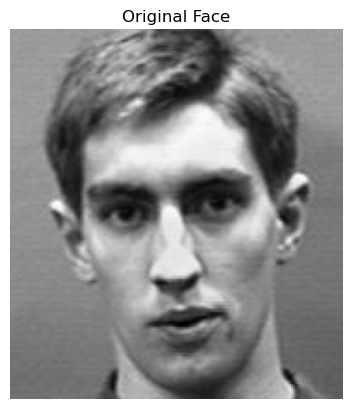

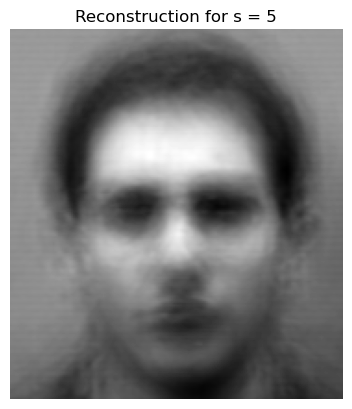

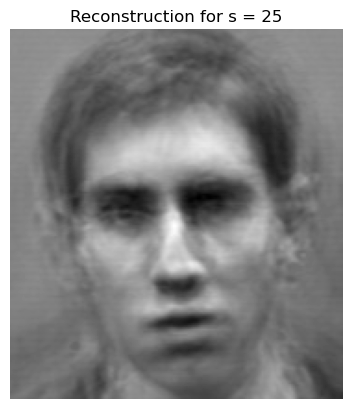

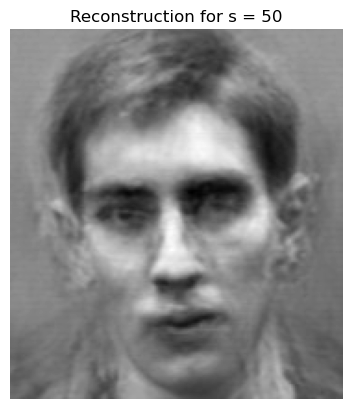

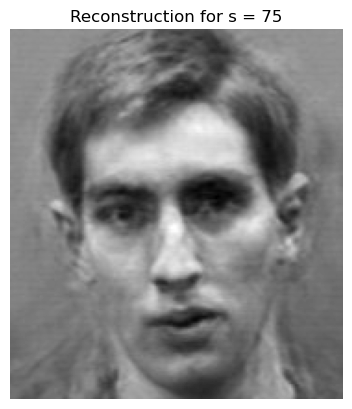

In [71]:
s = [5, 25, 50, 75]

plt.title("Original Face")
show(F[:,40])

for i in s:
    goofy_f = image.U[:,:i] @ image.project((image.F_bar[:,40]), i) + image.mu
    plt.title("Reconstruction for s = " + str(i))
    show(goofy_f)

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

/var/folders/zp/926j9lz54wq_b9kjm_r0gvtw0000gp/T/ipykernel_71663/1106870313.py:46: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  yield np.ravel(imread(fname, as_gray=True))


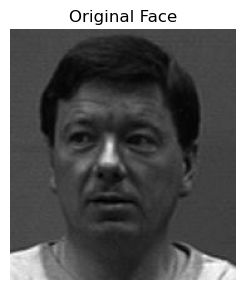

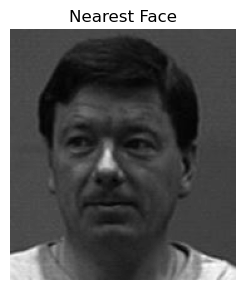

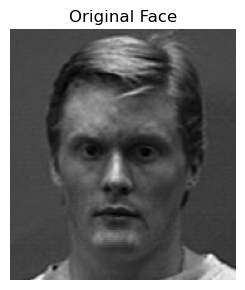

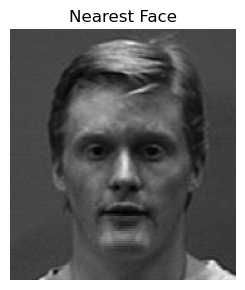

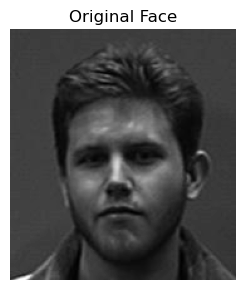

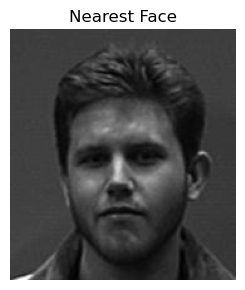

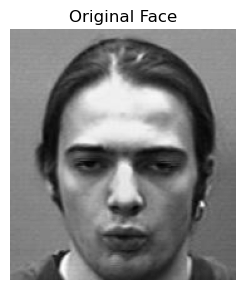

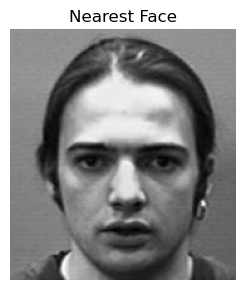

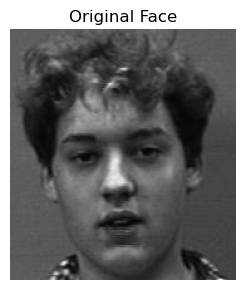

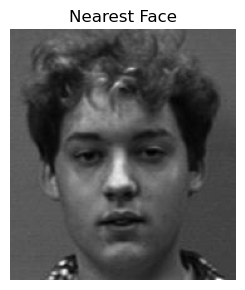

In [72]:
for test_image in sample_faces(5):
    image.match(test_image)